In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [4]:
movies_df = pd.read_csv('movies.csv')

#### What was the runtime for each movie?

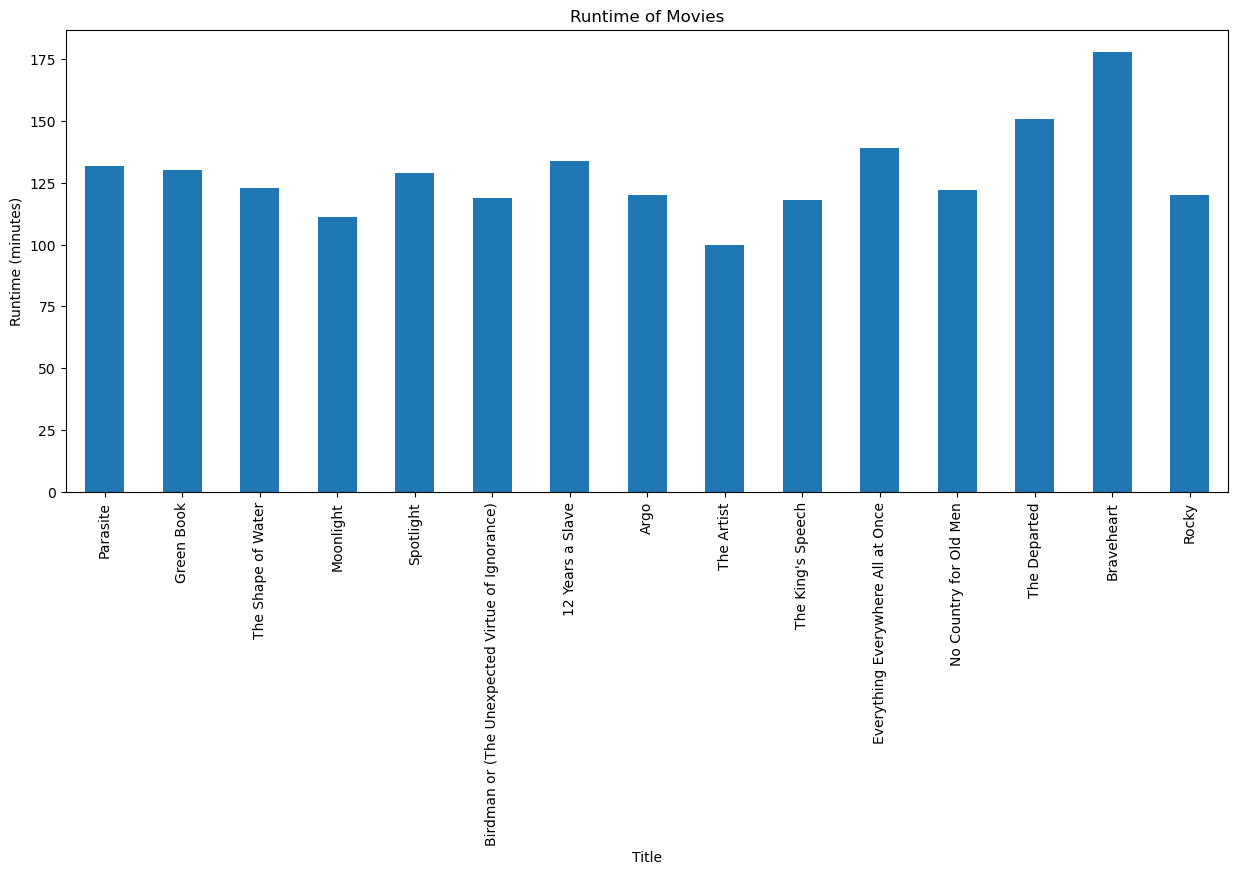

In [10]:
movies_df['Runtime'].plot(kind='bar', figsize=(15, 6))

plt.xlabel('Title')
plt.ylabel('Runtime (minutes)')
plt.title('Runtime of Movies')

plt.show()

#### What movie had the longest runtime?

In [13]:
max_runtime = movies_df['Runtime'].max()

longest_movie = movies_df[movies_df['Runtime'] == max_runtime]

for index, row in longest_movie.iterrows():
    print(f"Movie Title: {index}, Runtime: {row['Runtime']} minutes")

Movie Title: Braveheart, Runtime: 178 minutes


#### Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

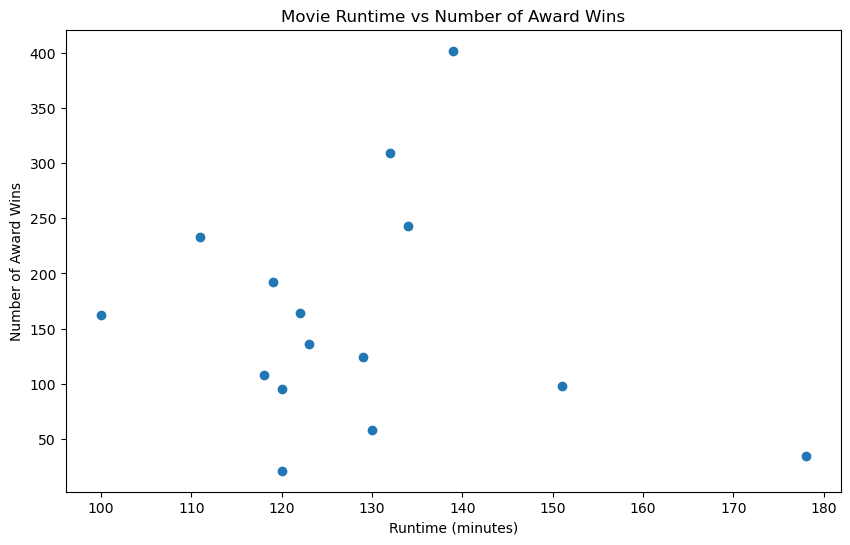

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Runtime'], movies_df['Award Wins'])

plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Award Wins')
plt.title('Movie Runtime vs Number of Award Wins')

plt.show()

In [28]:
correlation = movies_df['Runtime'].corr(movies_df['Award Wins'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.1330293837438061


#### How many awards and nominations did each movie receive?

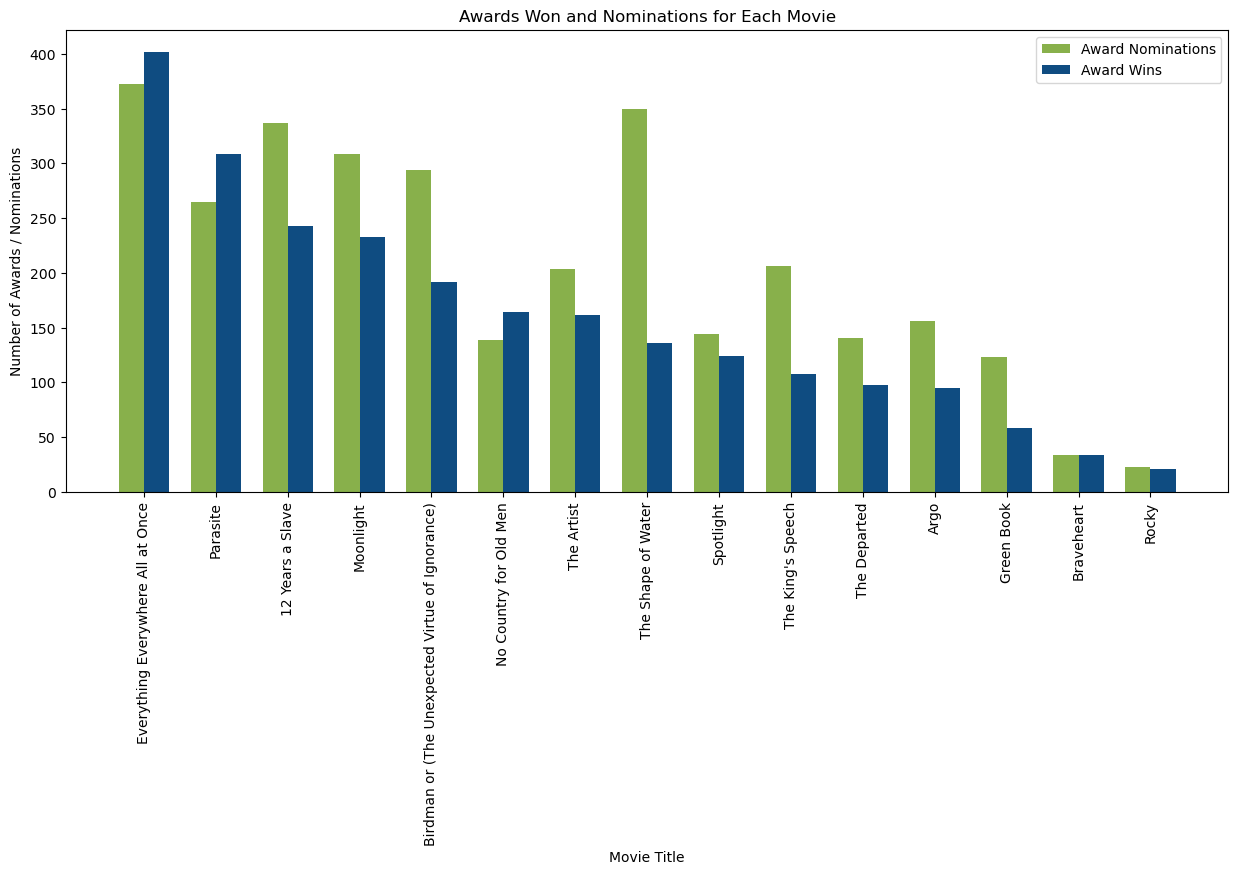

In [37]:
bar_width = 0.35

color_award_wins = '#0F4C81'
color_award_noms = '#88B04B'

index = movies_df.index

bar1 = [i for i in range(len(movies_df))]
bar2 = [i + bar_width for i in bar1]

plt.figure(figsize=(15, 6))
plt.bar(bar1, movies_df['Award Nominations'], width=bar_width, label='Award Nominations', color=color_award_noms)
plt.bar(bar2, movies_df['Award Wins'], width=bar_width, label='Award Wins', color=color_award_wins)

plt.xlabel('Movie Title')
plt.ylabel('Number of Awards / Nominations')
plt.title('Awards Won and Nominations for Each Movie')
plt.xticks([r + bar_width/2 for r in range(len(movies_df))], index, rotation=90)

plt.legend()

plt.show()

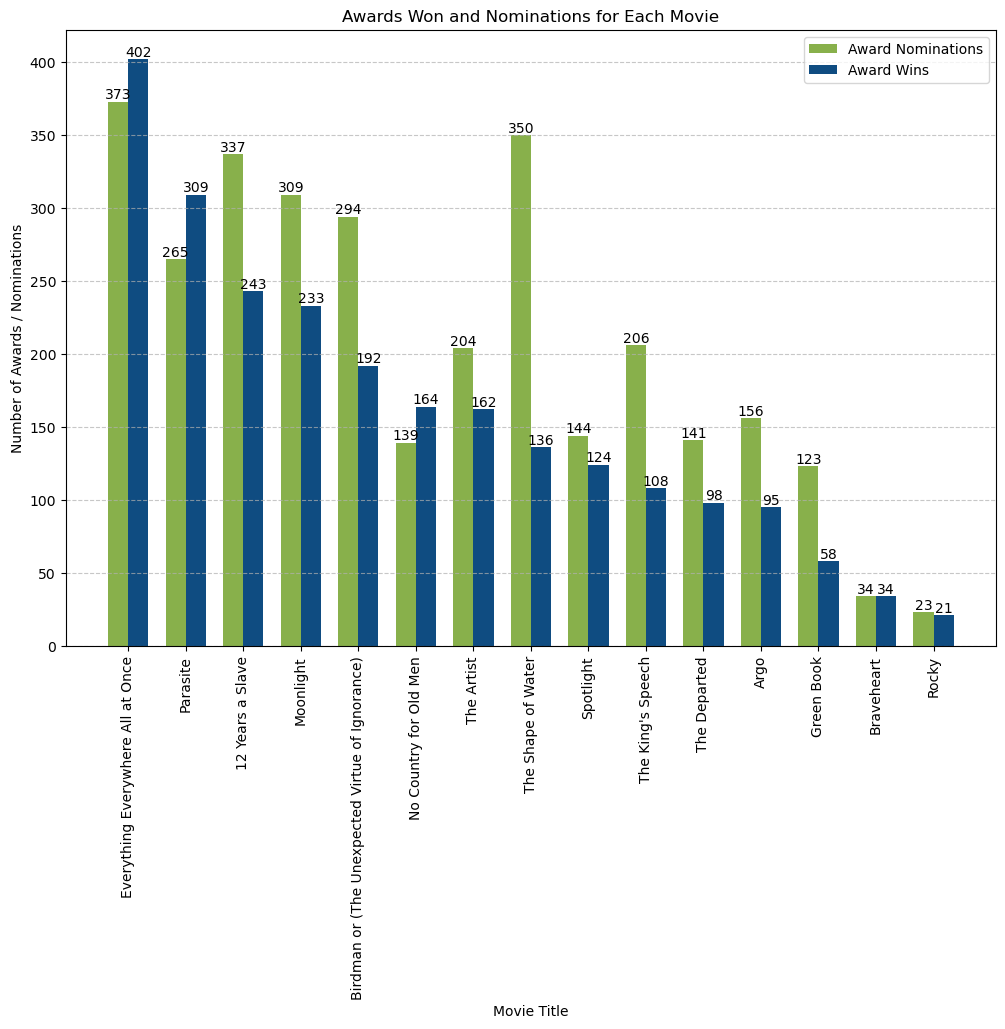

In [26]:
bar_width = 0.35
color_award_wins = '#0F4C81'
color_award_noms = '#88B04B'

movies_df.sort_values('Award Wins', ascending=False, inplace=True)

index = movies_df.index
bar1 = [i for i in range(len(movies_df))]
bar2 = [i + bar_width for i in bar1]

plt.figure(figsize=(12, 8))
bars1 = plt.bar(bar1, movies_df['Award Nominations'], width=bar_width, label='Award Nominations', color=color_award_noms)
bars2 = plt.bar(bar2, movies_df['Award Wins'], width=bar_width, label='Award Wins', color=color_award_wins)

plt.xlabel('Movie Title')
plt.ylabel('Number of Awards / Nominations')
plt.title('Awards Won and Nominations for Each Movie')
plt.xticks([r + bar_width/2 for r in range(len(movies_df))], index, rotation=90)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()

## Extra Credit

#### Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

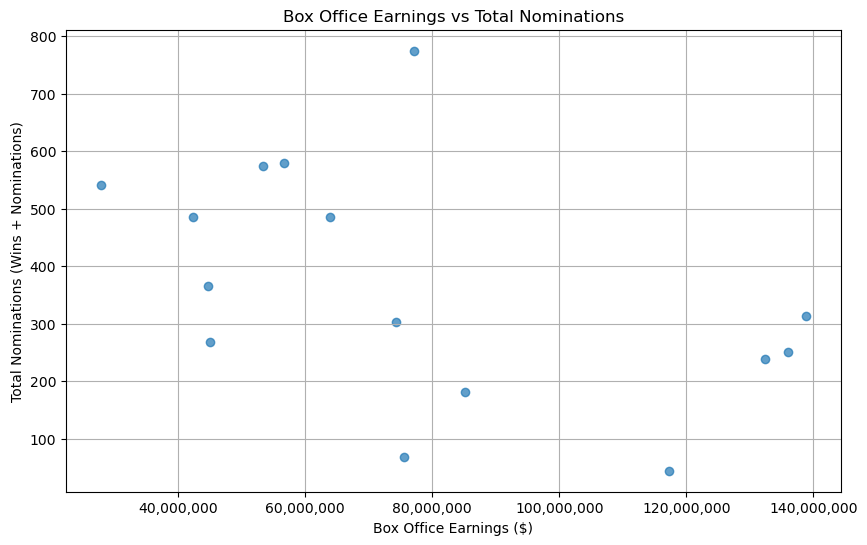

Correlation coefficient: -0.48704402521260604


In [38]:
movies_df['Total Nominations'] = movies_df['Award Wins'] + movies_df['Award Nominations']

plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Box Office'], movies_df['Total Nominations'], alpha=0.7)
plt.title('Box Office Earnings vs Total Nominations')
plt.xlabel('Box Office Earnings ($)')
plt.ylabel('Total Nominations (Wins + Nominations)')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True)
plt.show()

correlation_2 = movies_df['Box Office'].corr(movies_df['Total Nominations'])
print(f"Correlation coefficient: {correlation_2}")

#### Is there a relationship between box office earnings and movie runtimes?

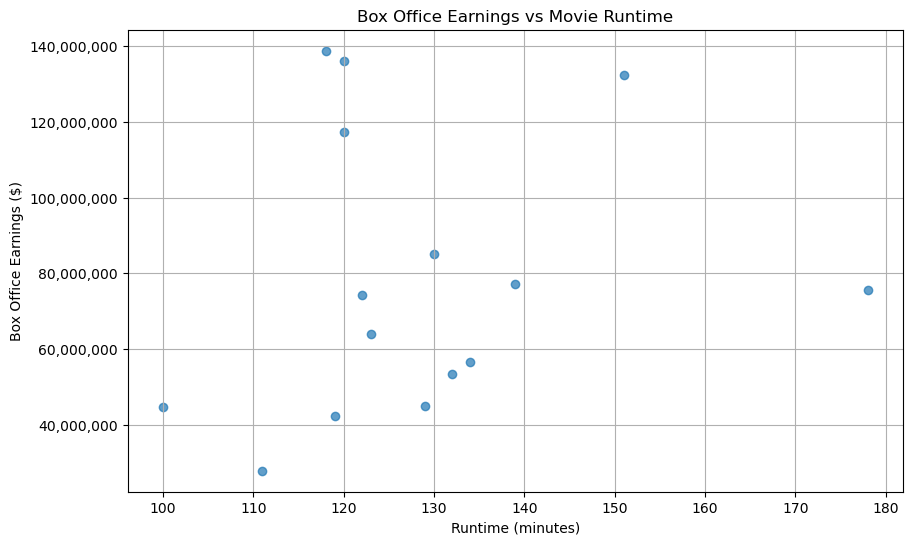

Correlation coefficient: 0.1805272156025995


In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Runtime'], movies_df['Box Office'], alpha=0.7)
plt.title('Box Office Earnings vs Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office Earnings ($)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True)
plt.show()

correlation = movies_df['Runtime'].corr(movies_df['Box Office'])
print(f"Correlation coefficient: {correlation}")

In [33]:
print(movies_df['Box Office'].head())

Movie Title
Everything Everywhere All at Once                  77191785
Parasite                                           53369749
12 Years a Slave                                   56671993
Moonlight                                          27854932
Birdman or (The Unexpected Virtue of Ignorance)    42340598
Name: Box Office, dtype: int64
